# FLIP (02) Optimization Data Science

---
Team Director: Meng Ren | mren@tulip.academy<br />

TULIP Academy <br />
http://www.tulip.academy 

---

Hyperbolic equations and information
====================================

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16
rcParams['figure.figsize'] = (12,6)

Information propagation
-----------------------

### Partial differential equations

Partial differential equations (PDEs) involve derivatives of functions
of more than one variable, say $u(x, y)$ or $y(t,
  x)$. Hence more complex behaviour and more interesting physics.

Only look at linear problems. Also only consider finite difference
methods: simple to analyse but not always competitive.

Only stable and convergent method for hyperbolic equations seen is
Forward Time, Backwards Space (FTBS), sometimes called the *upwind*
method. Von Neumann stability “explains” failure of the FTCS method, but
does not help in producing more accurate algorithms.

### Characteristics for the advection equation

Focus on advection equation

$$\partial_t y + v \partial_x y = 0.$$

As hyperbolic, write in terms of convection or advection number $c = v \delta / h$ ($\delta$ time step, $h$ space step).

$$\partial_t y + v \partial_x y = 0.$$

Hyperbolic equations propagate information. There are curves, $x(t)$,
along which $y$ *does not change*.

Look at $y\left( x(t), t \right)$. 

If the solution does not change then

$$\begin{aligned}
0 & = \frac{\text{d}{}}{\text{d}{t}} y\left( x(t), t \right) \\
  & = \frac{\text{d}{x(t)}}{\text{d}{t}} \partial_x y + \partial_t y \\
  & = \left( \frac{\text{d}{x(t)}}{\text{d}{t}} - v \right) \partial_x y. \\
\Rightarrow \quad x(t) & = v t.
\end{aligned}$$

Information is propagated *without changing* along straight lines
(*characteristic curves*) in $(x, t)$ with slope $v$.

Upwind methods
--------------

### Reinterpreting FTBS

 Look at characteristics for advection equation on a
grid.  Given value of $y^{n+1}_i$, could follow
characteristic *back in time* to known data at $t^n$.
Will not land on a grid point, so must interpolate. 

Linear interpolation gives

$$y_i^{n+1} = (1 - \frac{v \delta}{h}) y_i^n + \frac{v \delta}{h}
y_{i-1}^n.$$

 This is exactly FTBS.

### Interpreting the stability result

 If timestep $\delta$ too large ($c > 1$) then
characteristic, traced back to known data, does not fall between $x_i$
and $x_{i-1}$.  Would be *extrapolating* using FTBS;
generically unstable. Known as the *Courant-Friedrichs-Lewy* (CFL)
condition.  If $v<0$ then FTBS is an extrapolation; Von
Neumann analysis shows FTBS unconditionally unstable (note $c < 0$).
 Should be clear that FTFS will work in this case.

### Upwind methods

The direction of information propagation depends on sign of $v$; called
*wind direction* (climate analogy). Information propagates with wind, or
*upwind*: stable numerical algorithms take this into account.

Simplest upwind algorithm: choose FTBS or FTFS depending on sign of $v$.

$$\begin{aligned}
v & > 0 \quad \Rightarrow  \text{FTBS} \\
v & < 0 \quad \Rightarrow  \text{FTFS} .
\end{aligned}$$

If advection velocity depends on *space*, $v \equiv v(x)$, make choice
*pointwise*. For each $x_i$ check sign of $v(x_i)$. Then update
$y_i^{n+1}$ depending on sign of $v(x_i)$.

Nonlinear equations
===================

Burger’s equation
-----------------

Nonlinear hyperbolic equations can produce complex behaviour from simple
initial data. Toy problem: *Burger’s equation*

$$\partial_t y + \partial_x \left( \tfrac{1}{2} y^2 \right) = 0.$$

A linearization of Euler equations, useful in gasdynamics.

If $y$ remains differentiable, can be written as

$$\partial_t y + y \partial_x y = 0.$$

Looks like advection equation, except advection velocity $v$ varies in
space – it is the solution $y$ itself!

### Evolving to form shocks

Start with smooth initial data. We “trace along the characteristics”:
the *form* of the data changes. It steadily steepens.

Eventually function not well-defined: in reality, a *shock* forms.

### Numerical evolutions of Burger’s equation

Evolve using upwind methods. If $y_i$ is positive use FTBS, otherwise
FTFS.

At low resolution see profile steepen and discontinuity form. Increase resolution and see similar behaviour, better resolved leading to the shock.

In [5]:
def initial_data(x):
    y = np.sin(2.0 * np.pi *x)
            
    return y

def upwind_burgers(y, ynew, c):
    for i in range(1, len(y)-1):
        if (y[i] > 0.0):
            ynew[i] = y[i] - c * 0.5 * (y[i]**2 - y[i-1]**2)
        else:
            ynew[i] = y[i] - c * 0.5 * (y[i+1]**2 - y[i]**2)
    # Periodic boundary conditions
    if (y[0] > 0.0):
        ynew[0] = y[0] - c * 0.5 * (y[0]**2 - y[-2]**2)
    else:
        ynew[0] = y[0] - c * 0.5 * (y[1]**2 - y[0]**2)
    ynew[-1] = ynew[0]
    
Nx = 40
h = 1.0 / (Nx + 1.0)
t_end = 0.25
c = 1.0 / 2.0 # c = delta / h
delta = c * h
Nt = int(t_end / delta)+1

x = np.linspace(0.0, 1.0, Nx+2)
y = initial_data(x)
ynew = np.zeros_like(y)
for n in range(Nt):
    upwind_burgers(y, ynew, c)
    y = ynew

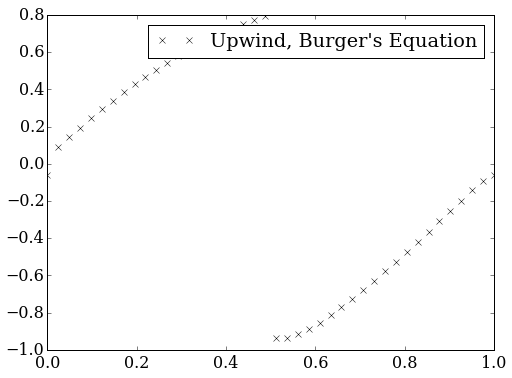

In [6]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
ax.plot(x, y, 'kx', label = "Upwind, Burger's Equation")
ax.legend()
plt.show()

Summary
=======


-   Upwind methods take into account the direction and speed of information propagation.

-   As they rely on information propagation they only work for hyperbolic problems.

-   Most upwind methods are explicit and conditionally stable, requiring the CFL condition.

-   The upwind condition allows for the reinterpretation of, e.g., FTBS.

-   Upwind methods can be extended to problems where the advection velocity varies in space, or to genuinely nonlinear problems.

-   Genuinely nonlinear problems that involve discontinuities forming are typically solved using upwind methods; extensions to higher order accuracy are non-trivial work.